In [1]:
#데이터불러오기
election <- read.csv("Rdata/election_2022.csv")
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [2]:
colnames(election)

[1] "광역시도" "시군구"   "선거인수" "투표수"   "이재명"   "윤석열"   "심상정"

In [3]:
table(election$광역시도)
voter_sum <- aggregate(투표수 ~ 광역시도, election, sum) #투표인
voter_sum



        강원도         경기도       경상남도       경상북도     광주광역시 
            18             41             22             24              5 
    대구광역시     대전광역시     부산광역시     서울특별시 세종특별자치시 
             8              5             16             25              1 
    울산광역시     인천광역시       전라남도       전라북도 제주특별자치도 
             5             10             22             15              2 
      충청남도       충청북도 
            16             13 

광역시도,투표수
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831
세종특별자치시,231832


In [4]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [5]:
str(election)
# 시군구는 248개인데 factor은 226이네! 

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [6]:
summary(election)

       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

---
## 광역시도 투표율 구하기

In [7]:
# 라이브러리 불러오기
library(plotrix)
library(dplyr)

ERROR: Error in library(plotrix): there is no package called ‘plotrix’


In [8]:
turnout <- round(voter_sum$투표수 / sum(voter_sum$투표수) * 100,2)
turnout

[1]  3.01 25.23  6.36  5.25  2.92  4.77  2.80  6.52 19.26  0.69  2.18  5.58
[13]  3.80  3.66  1.21  3.92  2.85

In [9]:
voter_sum$투표율 <- turnout
voter_sum<- arrange(voter_sum,desc(투표율))
voter_sum

ERROR: Error in arrange(voter_sum, desc(투표율)): 함수 "arrange"를 찾을 수 없습니다


In [10]:
turnout_ratio <- voter_sum[,c(1,3)]
turnout_ratio 

광역시도,투표율
강원도,3.01
경기도,25.23
경상남도,6.36
경상북도,5.25
광주광역시,2.92
대구광역시,4.77
대전광역시,2.80
부산광역시,6.52
서울특별시,19.26
세종특별자치시,0.69


In [11]:
#label 만들기
투표율 <- paste(turnout_ratio$광역시도,"\n",turnout_ratio$투표율,"%")
투표율

[1] "강원도 \n 3.01 %"         "경기도 \n 25.23 %"       
 [3] "경상남도 \n 6.36 %"       "경상북도 \n 5.25 %"      
 [5] "광주광역시 \n 2.92 %"     "대구광역시 \n 4.77 %"    
 [7] "대전광역시 \n 2.8 %"      "부산광역시 \n 6.52 %"    
 [9] "서울특별시 \n 19.26 %"    "세종특별자치시 \n 0.69 %"
[11] "울산광역시 \n 2.18 %"     "인천광역시 \n 5.58 %"    
[13] "전라남도 \n 3.8 %"        "전라북도 \n 3.66 %"      
[15] "제주특별자치도 \n 1.21 %" "충청남도 \n 3.92 %"      
[17] "충청북도 \n 2.85 %"

In [12]:
par(family = "AppleGothic")
options(warn = -1)
pie3D( turnout_ratio$투표율,
        main = "광역시도별 투표율",
        labels = 투표율,
        explode = 0.05,
        labelcex = 0.6,
        #radius = 0.8
     )

ERROR: Error in pie3D(turnout_ratio$투표율, main = "광역시도별 투표율", : 함수 "pie3D"를 찾을 수 없습니다


In [13]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum <- apply(election[, 5:7], 1,sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [14]:
# electionRation <- 투표수대비 electionSum의 퍼센트 구해서 넣기
election$electionRatio <- election$electionSum / election$투표수 * 100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [15]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기
# 1) 정렬
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
arrange(election, desc(electionRatio))[1,]
arrange(election, desc(electionRatio))[nrow(election),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [17]:
#2) subset
subset(election, electionRatio == max(election$electionRatio))
subset(election, electionRatio == min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [18]:
# election_2022_job1.csv로 저장하기
write.csv(election,"Rdata/election_2022_job1.csv", row.names = F)

## 각 후보(윤,이,심)의 광역시도별 득표율을 3D Pie Chart로 표현하기
## (단, 득표율이 3% 미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다./퍼센트 단위는 소수 한자리)

In [19]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [20]:
electionSim <-
aggregate(심상정 ~ 광역시도, election, sum)
electionSim

광역시도,심상정
강원도,25031
경기도,201113
경상남도,52591
경상북도,33123
광주광역시,14865
대구광역시,31131
대전광역시,25445
부산광역시,47541
서울특별시,180324
세종특별자치시,6780


In [21]:
#Ratio 값 구하기
electionSim$득표율 <-
round(electionSim$심상정 / sum(electionSim$심상정) *100,2)     
electionSim

광역시도,심상정,득표율
강원도,25031,3.14
경기도,201113,25.22
경상남도,52591,6.59
경상북도,33123,4.15
광주광역시,14865,1.86
대구광역시,31131,3.90
대전광역시,25445,3.19
부산광역시,47541,5.96
서울특별시,180324,22.61
세종특별자치시,6780,0.85


In [22]:
electionSim_ratio <-
electionSim[,c(1,3)]
electionSim_ratio

광역시도,득표율
강원도,3.14
경기도,25.22
경상남도,6.59
경상북도,4.15
광주광역시,1.86
대구광역시,3.90
대전광역시,3.19
부산광역시,5.96
서울특별시,22.61
세종특별자치시,0.85


In [23]:
# label 구하기
#electionSim_ratio$광역시도 Index 값이 나온건 Fector이기 떄문에 그래서 형변환을 해줘야함.
Sim투표율 <-
ifelse(electionSim_ratio$득표율>3,
        paste(electionSim_ratio$광역시도,"\n",electionSim_ratio$득표율,"%"),
        as.character(electionSim_ratio$광역시도))
Sim투표율 

[1] "강원도 \n 3.14 %"      "경기도 \n 25.22 %"     "경상남도 \n 6.59 %"   
 [4] "경상북도 \n 4.15 %"    "광주광역시"            "대구광역시 \n 3.9 %"  
 [7] "대전광역시 \n 3.19 %"  "부산광역시 \n 5.96 %"  "서울특별시 \n 22.61 %"
[10] "세종특별자치시"        "울산광역시"            "인천광역시 \n 6.5 %"  
[13] "전라남도"              "전라북도"              "제주특별자치도"       
[16] "충청남도 \n 3.99 %"    "충청북도 \n 3.17 %"

In [24]:
par(family = "AppleGothic")
options(warn = -1)
pie3D( electionSim_ratio$득표율,
        main = "심상정 득표율",
        labels = Sim투표율,
        explode = 0.05,
        labelcex = 0.8,
        #radius = 0.8
     )

ERROR: Error in pie3D(electionSim_ratio$득표율, main = "심상정 득표율", : 함수 "pie3D"를 찾을 수 없습니다


In [25]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트?
sum(voter_sum$투표수[c(2,9,12),])/sum(voter_sum$투표수)

ERROR: Error in voter_sum$투표수[c(2, 9, 12), ]: incorrect number of dimensions


In [26]:
# 윤석열 후보의 서울득표 top5를 구하고 나머지 지역은 기타로 합치기
head(election)
election_seoul <- arrange(subset(election, 광역시도 == '서울특별시'),desc(윤석열))
#election_seoul
election_seoul$윤석열득표 <-round(election_seoul$윤석열 / sum(election_seoul$윤석열) * 100, 2)
head(election_seoul)
#election_seoul[1:5,]


#election_seoul[6:nrow(election_seoul),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,윤석열득표
서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.40630,7.84
서울특별시,강남구,451970,354778,106865,235897,7020,349782,98.59180,7.25
서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04303,5.58
서울특별시,서초구,344756,277878,88686,179472,5864,274022,98.61234,5.51
서울특별시,노원구,441879,349297,169275,163340,10021,342636,98.09303,5.02
서울특별시,강동구,397634,313203,139172,160593,8029,307794,98.27301,4.93


In [27]:
par(family = "AppleGothic")
pie3D(election_seoul$윤석열득표,
      main = "윤석열 후보 서울 득표 Top5",
      
     )

ERROR: Error in pie3D(election_seoul$윤석열득표, main = "윤석열 후보 서울 득표 Top5", : 함수 "pie3D"를 찾을 수 없습니다


### 윤석렬 후보의 서울 특표 Top5만 득표율로 표시하고 나머지 지역은 기타로 합치기


In [28]:
#서울특별시 Data만 발췌하기
#subset(election, 광역시도 == "서울특별시")

election_seoul2 <- election[election$광역시도 == "서울특별시",] # 파이썬에선 이걸 많이씀.
election_seoul2_윤석열 <- arrange(election_seoul2, desc(윤석열))[, c(2,6)]
head(election_seoul2_윤석열)

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593


In [29]:
#Ratio 구하기
election_seoul2_윤석열_ratio <- 
    round(c(election_seoul2_윤석열[1:5, 2], sum(election_seoul2_윤석열[-c(1:5), 2])) /
    sum(election_seoul2_윤석열$윤석열) * 100, 2)
election_seoul2_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [30]:
#Label만들기
election_seoul2_윤석열_label <- c(as.character(election_seoul2_윤석열$시군구[1:5]),"기타")
election_seoul2_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

In [31]:
election_seoul2_윤석열_label<- 
paste(election_seoul2_윤석열_label,"\n",election_seoul2_윤석열_ratio,"%")

#election_seoul2_윤석열_label

In [32]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(election_seoul2_윤석열_ratio,
      labels = election_seoul2_윤석열_label,
      explode = 0.05,
      labelcex = 0.8,
      main = "윤석열 후보 서울 득표 Top5"
     )

ERROR: Error in pie3D(election_seoul2_윤석열_ratio, labels = election_seoul2_윤석열_label, : 함수 "pie3D"를 찾을 수 없습니다


In [33]:
#대선주자 출생자별 득표율 분석
#서울시 성북구의 후보별 득표율
election_seoul3 <- election[c(election$광역시도 == "서울특별시" & election$시군구=="성북구"),]
election_seoul3

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [34]:
# ratio 구하기
election_seoul3_ratio <- round(election_seoul3[5:7] / election_seoul3$투표수 * 100,2)
election_seoul3_ratio

,이재명,윤석열,심상정
8,48.84,46.22,3.06


In [35]:
#label 만들기
election_seoul3_ratio

,이재명,윤석열,심상정
8,48.84,46.22,3.06


In [36]:
par(family = "AppleGothic")
pie3Delection_seoul3_ratio)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:27: 예기치 않은 ')'입니다
1: par(family = "AppleGothic")
2: pie3Delection_seoul3_ratio)
                             ^


In [37]:
pob_윤석열 <- subset(election, 시군구 == "성북구")
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [38]:
#백터로 합쳐보자
pob_윤석열_num <-
as.numeric(c(pob_윤석열[, 5:7], pob_윤석열[,4] - sum(pob_윤석열[, 5:7])))
pob_윤석열_num

[1] 142702 135044   8952   5489

In [39]:
colnames(pob_윤석열)[5:7]

[1] "이재명" "윤석열" "심상정"

In [40]:
#label
pob_윤석열_label <-
paste(c(colnames(pob_윤석열)[5:7],"기타"),round(pob_윤석열_num/pob_윤석열$투표수*100,2))

In [41]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(pob_윤석열_num,
     labels = pob_윤석열_label,
      explode = 0.05,
      labelcex = 0.8,
      col = c("skyblue","red","yellow","grey"),
      main = "서울시 성북구의 후보별 득표율"
     )

ERROR: Error in pie3D(pob_윤석열_num, labels = pob_윤석열_label, explode = 0.05, : 함수 "pie3D"를 찾을 수 없습니다


---
### 투표수가 가장 많은 4지역(광역시도)의 후보별 득표수 차이를 막대그프로 시각화

In [42]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [43]:
election_search <-aggregate(투표수~광역시도,election,sum)
election_search

광역시도,투표수
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831
세종특별자치시,231832


In [44]:
aggregate(이재명~광역시도,election,sum)

광역시도,이재명
강원도,419644
경기도,4297931
경상남도,794130
경상북도,418371
광주광역시,830058
대구광역시,345045
대전광역시,434950
부산광역시,831896
서울특별시,2944981
세종특별자치시,119349


In [45]:
election_search_이재명 <- aggregate(이재명~광역시도,election,sum)
head(election_search_이재명)
election_search$이재명 <- election_search_이재명$이재명
head(election_search)

광역시도,이재명
강원도,419644
경기도,4297931
경상남도,794130
경상북도,418371
광주광역시,830058
대구광역시,345045


광역시도,투표수,이재명
강원도,1015458,419644
경기도,8518854,4297931
경상남도,2146882,794130
경상북도,1774284,418371
광주광역시,985492,830058
대구광역시,1611512,345045


In [46]:
election_search_윤석열 <- aggregate(윤석열~광역시도,election,sum)
head(election_search_윤석열)

광역시도,윤석열
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888


In [47]:
election_search$윤석열 <- election_search_윤석열$윤석열
head(election_search)

광역시도,투표수,이재명,윤석열
강원도,1015458,419644,544980
경기도,8518854,4297931,3859666
경상남도,2146882,794130,1237346
경상북도,1774284,418371,1278922
광주광역시,985492,830058,124511
대구광역시,1611512,345045,1199888


In [48]:
election_search_심상정 <- aggregate(심상정~광역시도,election,sum)
head(election_search_심상정)

광역시도,심상정
강원도,25031
경기도,201113
경상남도,52591
경상북도,33123
광주광역시,14865
대구광역시,31131


In [49]:
election_search$심상정 <- election_search_심상정$심상정
head(election_search)

광역시도,투표수,이재명,윤석열,심상정
강원도,1015458,419644,544980,25031
경기도,8518854,4297931,3859666,201113
경상남도,2146882,794130,1237346,52591
경상북도,1774284,418371,1278922,33123
광주광역시,985492,830058,124511,14865
대구광역시,1611512,345045,1199888,31131


In [50]:
election_search_top4 <-
arrange(election_search, desc(투표수))[1:4,3:5]
election_search_top4

이재명,윤석열,심상정
4297931,3859666,201113
2944981,3255747,180324
831896,1270072,47541
794130,1237346,52591


In [51]:
election_search_top4t <-t(election_search_top4)

colnames(election_search_top4t) =c("경기도","서울특별시","부산광역시","경상남도")
election_search_top4t 

,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [52]:
election_search_top4t2 <-
as.matrix(election_search_top4t)
election_search_top4t2

,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [53]:
# data 값 chr 값 들어가면 그래프 생성시 오류 발생
# 꼭 str값 확인!
str(election_search_top4t2)


 int [1:3, 1:4] 4297931 3859666 201113 2944981 3255747 180324 831896 1270072 47541 794130 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:3] "이재명" "윤석열" "심상정"
  ..$ : chr [1:4] "경기도" "서울특별시" "부산광역시" "경상남도"


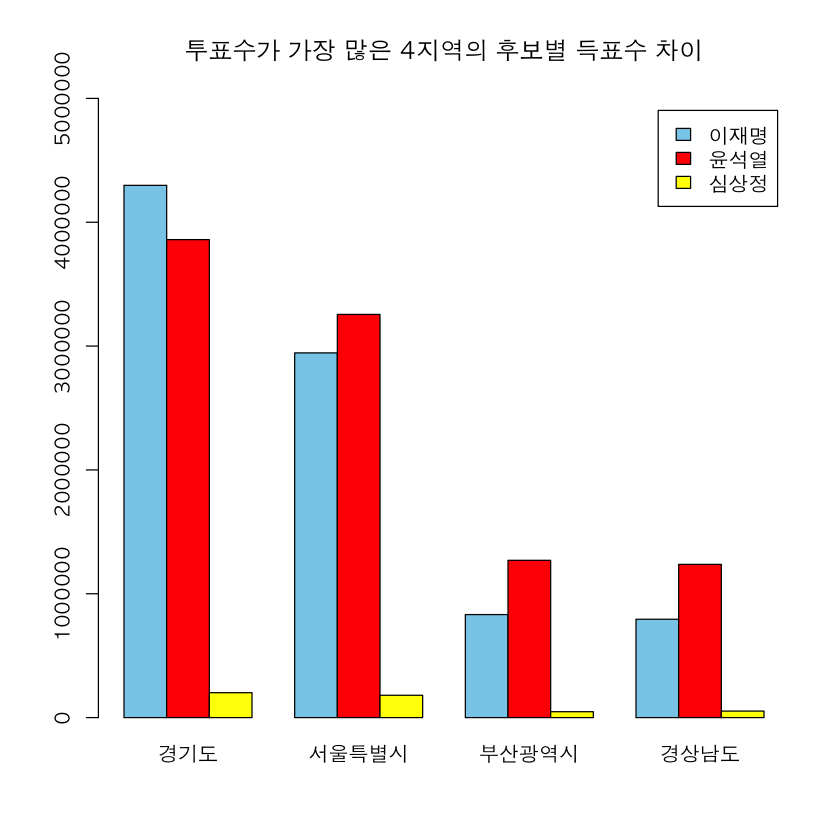

In [54]:
par(family = "AppleGothic")
options(scipen = 100)# 지수 없애기
barplot(election_search_top4t2,
        beside = T,
        legend.text = T,
        ylim = c(0, 5000000),
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
        #names = c("경기도","서울특별시","부산광역시","경상남도")
        col = c("skyblue","red","yellow"),
       )

---
# 투표수가 높은 시군구의 후보별 득표수 막대그래프로 시각화
#### Top5

In [55]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [56]:
election_시군구_top5 <- 
arrange(election, desc(투표수))[1:5,c(2,5:7)]
election_시군구_top5

시군구,이재명,윤석열,심상정
화성시,283324,236055,12955
부천시,285227,224331,13249
남양주시,239179,203075,10089
송파구,180490,255166,10652
강서구,190000,181510,11100


In [57]:
election_t시군구_top5 <- 
t(election_시군구_top5[2:4])
election_t시군구_top5

,1,2,3,4,5
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


In [58]:
colnames(election_t시군구_top5) <- c("화성시","부천시","남양주시","송파구","강서구")
election_t시군구_top5

,화성시,부천시,남양주시,송파구,강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


In [59]:
str(election_t시군구_top5)

 int [1:3, 1:5] 283324 236055 12955 285227 224331 13249 239179 203075 10089 180490 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:3] "이재명" "윤석열" "심상정"
  ..$ : chr [1:5] "화성시" "부천시" "남양주시" "송파구" ...


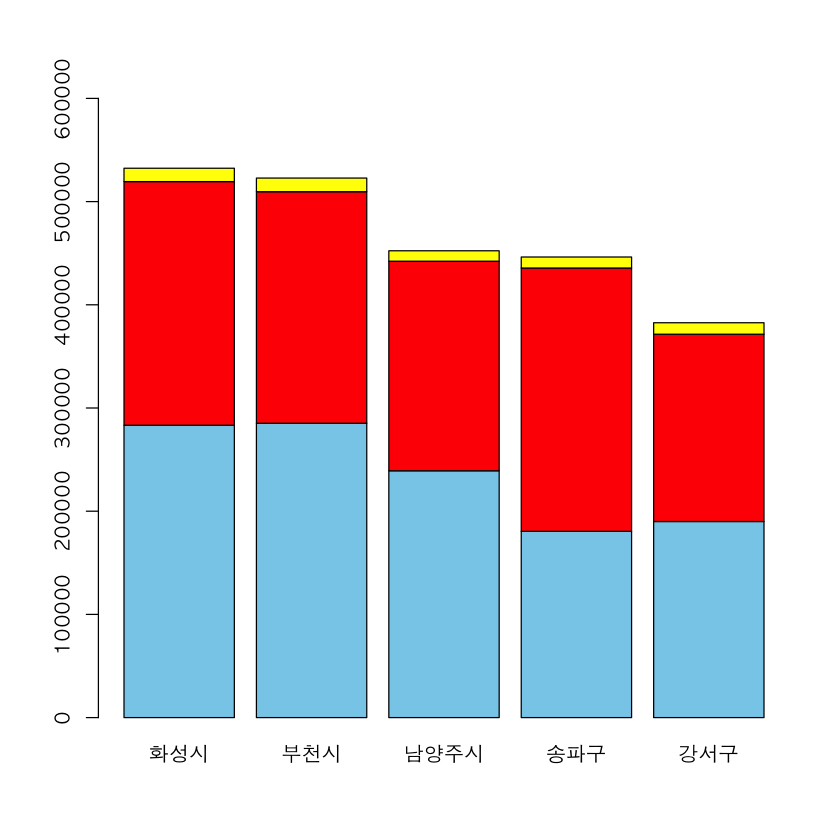

In [60]:
par(family = "AppleGothic")
options(scipen = 100) # 지수 없애기
barplot(election_t시군구_top5,
       ylim = c(0, 600000),
       col = c("skyblue","red","yellow"))

---
## 20대 대선 권역별 후보 득표율을 꺽은선 그래프로 표현하시요.

수도권:<br>
('서울특별시','인천광역시','경기도')<br><br>
강원도:<br>
'강원도'<br><br>
영남:<br>
('경상북도','경상남도','대구광역시','부산광역시','울산광역시')<br><br>
충청:<br>
('충청북도','충청남도','세종특별자치시','대전광역시')<br><br>
호남:<br>
('전라남도','전라북도','제주특별자치도','광주광역시')<br><br>
수도권 <- c('서울특별시','인천광역시','경기도')<br>
강원권 <- '강원도'<br>
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')<br>
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')<br>
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')<br>

- 제목 : 20대 대선 권역별 후보 득표율

In [61]:
library(stringr)

In [62]:
head(election_search)

광역시도,투표수,이재명,윤석열,심상정
강원도,1015458,419644,544980,25031
경기도,8518854,4297931,3859666,201113
경상남도,2146882,794130,1237346,52591
경상북도,1774284,418371,1278922,33123
광주광역시,985492,830058,124511,14865
대구광역시,1611512,345045,1199888,31131


In [63]:
#투표율
#election_search$이투표율 <- election_search$이재명 / election_search$투표수 * 100
#election_search$윤투표율 <- election_search$윤석열 / election_search$투표수 * 100
#election_search$심투표율 <- election_search$심상정 / election_search$투표수 * 100
#head(election_search)

In [64]:
election_search                             

광역시도,투표수,이재명,윤석열,심상정
강원도,1015458,419644,544980,25031
경기도,8518854,4297931,3859666,201113
경상남도,2146882,794130,1237346,52591
경상북도,1774284,418371,1278922,33123
광주광역시,985492,830058,124511,14865
대구광역시,1611512,345045,1199888,31131
대전광역시,945308,434950,464060,25445
부산광역시,2200224,831896,1270072,47541
서울특별시,6501831,2944981,3255747,180324
세종특별자치시,231832,119349,101491,6780


In [65]:
#수도권:('서울특별시','인천광역시','경기도')

#print(str_locate(election_투표율$광역시도 , '서울특별시'))#9
#print(str_locate(election_투표율$광역시도 , '인천광역시'))#12
#print(str_locate(election_투표율$광역시도, '경기도')) #2
#election_수도권 <-
#election_투표율[c(2,9,12),]


In [66]:
# 강원도: '강원도'
#print(str_locate(election_투표율$광역시도, '강원도')) #1
#election_강원도<-
#election_투표율[1,]

In [67]:
#영남:('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
#print(str_locate(election_투표율$광역시도, '경상북도')) #4

In [68]:
수도권 <-c('서울특별시','인천광역시','경기도')
강원권 <-'강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

election_search$지역 <- ifelse(election_search$광역시도 %in% 수도권,'수도권',
               ifelse(election_search$광역시도 %in% 강원권,'강원권',
                     ifelse(election_search$광역시도 %in% 영남권,'영남권',
                           ifelse(election_search$광역시도 %in% 충청권,'충청권','호남권'))))
election_search

광역시도,투표수,이재명,윤석열,심상정,지역
강원도,1015458,419644,544980,25031,강원권
경기도,8518854,4297931,3859666,201113,수도권
경상남도,2146882,794130,1237346,52591,영남권
경상북도,1774284,418371,1278922,33123,영남권
광주광역시,985492,830058,124511,14865,호남권
대구광역시,1611512,345045,1199888,31131,영남권
대전광역시,945308,434950,464060,25445,충청권
부산광역시,2200224,831896,1270072,47541,영남권
서울특별시,6501831,2944981,3255747,180324,수도권
세종특별자치시,231832,119349,101491,6780,충청권


In [69]:
election_투표수 <- 
t(data.frame(수도권,강원권,영남권,충청권,호남권))
election_투표수

ERROR: Error in data.frame(수도권, 강원권, 영남권, 충청권, 호남권): arguments imply differing number of rows: 3, 1, 5, 4


In [70]:
election_투표수df<-
as.data.frame(election_투표수)
election_투표수df

ERROR: Error in as.data.frame(election_투표수): 객체 'election_투표수'를 찾을 수 없습니다


In [71]:
election_투표수df$이재명 / election_투표수df$투표수 * 100

ERROR: Error in eval(expr, envir, enclos): 객체 'election_투표수df'를 찾을 수 없습니다


In [72]:
#투표율
election_투표수df$이투표율<- round(election_투표수df$이재명 / election_투표수df$투표수 * 100, 2)
election_투표수df$윤투표율 <- round(election_투표수df$윤석열 / election_투표수df$투표수 * 100, 2)
election_투표수df$심투표율 <- round(election_투표수df$심상정 / election_투표수df$투표수 * 100, 2)
head(election_투표수df)

ERROR: Error in eval(expr, envir, enclos): 객체 'election_투표수df'를 찾을 수 없습니다


In [73]:
election_투표율 <- election_투표수df[,5:7]
election_투표율

ERROR: Error in eval(expr, envir, enclos): 객체 'election_투표수df'를 찾을 수 없습니다


In [74]:
par(family = "AppleGothic")
options(scipen = 100) # 지수 없애기

plot(election_투표율$윤투표율,
     type = 'o',
     axes = F,
     ann  = F,
     col = "red",
     ylim = c(0,100)
    )

lines(election_투표율$이투표율,
    type = 'o',
      col = "blue"
    )

lines(election_투표율$심투표율,
    type = 'o',
     col = "yellow"
    )

axis(1, at=1:5, lab=c("수도권","강원권","영남권","충청권","호남권"))
axis(2, ylim=c(0:100))

legend(4,400,
       c('이재명','윤석열','심상정'),
       col = c("blue","red","yellow")
       

)

ERROR: Error in plot(election_투표율$윤투표율, type = "o", axes = F, ann = F, : 객체 'election_투표율'를 찾을 수 없습니다
